<a href="https://colab.research.google.com/github/linconsarker/machine-learning/blob/main/k_Nearest_Neighbors_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine(as_frame=True)
df = wine.frame

X = df.drop("target", axis=1)
y = df["target"]

print(df.head())
print(df['target'].value_counts())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # try different k values
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7222222222222222

Confusion Matrix:
 [[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



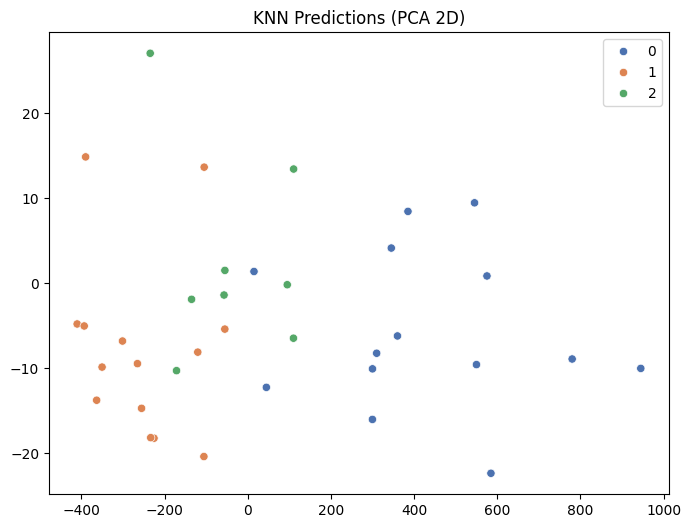

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn.fit(X_train_pca, y_train)
y_pred_pca = knn.predict(X_test_pca)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1], hue=y_pred_pca, palette="deep")
plt.title("KNN Predictions (PCA 2D)")
plt.show()


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine(as_frame=True)
X = wine.data
y = wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN with Euclidean distance (default)
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

# KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Accuracy (Euclidean): {acc_euclidean:.3f}")
print(f"Accuracy (Manhattan): {acc_manhattan:.3f}")


Accuracy (Euclidean): 0.722
Accuracy (Manhattan): 0.806


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import numpy as np

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit KNN classifiers
knn_euclidean.fit(X_train_pca, y_train)
knn_manhattan.fit(X_train_pca, y_train)

# Create meshgrid for plotting
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on meshgrid
Z_euclidean = knn_euclidean.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_manhattan = knn_manhattan.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Euclidean
axes[0].contourf(xx, yy, Z_euclidean, alpha=0.3, cmap=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF']))
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train, palette='deep', ax=axes[0])
axes[0].set_title('KNN (Euclidean Distance)')

# Manhattan
axes[1].contourf(xx, yy, Z_manhattan, alpha=0.3, cmap=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF']))
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train, palette='deep', ax=axes[1])
axes[1].set_title('KNN (Manhattan Distance)')

plt.show()
